#loading Dataset and Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("Datafile_2.csv")

In [17]:
df.head()

,Id,Url,Title,Breadcrumb,Address,City,PossesionDate,builtuparea,CarpetArea,Amenities,...,AgeOfProperty,Buildingname,Bedroom,bathroom,parking,price,Built up area Rate,Facing,Floors,Images
0,1,https://housing.com/in/buy/resale/page/2760130...,2 BHK Apartment,Home | Thane | Thane West | 2760130 |,"Swastik Regalia, Thane West, Thane",thane,Ready to move in,910 sq. ft.,700 sq. ft.,NaN,...,10 Years,Swastik Regalia,2,2.0,NaN,95.0 L,10.44 K per sq. ft.,NaN,Lower of 7 floors,NaN
1,2,https://housing.com/in/buy/resale/page/2757498...,2 BHK Apartment,Home | Thane | Thane West | 2757498 |,"Amara, Thane West, Thane",thane,"June, 2019",875 sq. ft.,660 sq. ft.,NaN,...,NaN,NaN,2,2.0,NaN,1.15 Cr,13.14 K per sq. ft.,NaN,,https://is1-2.housingcdn.com/01c16c28/54bf6a0d...
2,3,https://housing.com/in/buy/resale/page/2753188...,2 BHK Apartment,Home | Thane | Thane West | 2753188 |,"Vijay Galaxy Tower 1, Waghbil Naka, Thane West...",thane,Ready to move in,999 sq. ft.,638 sq. ft.,ParkingLiftSwimming PoolSports FacilityKids Ar...,...,3 Years,Vijay Galaxy Tower 1,2,2.0,1.0,1.1 Cr,11.01 K per sq. ft.,West,Middle of 17 floors,NaN
3,4,https://housing.com/in/buy/resale/page/2747709...,2 BHK Apartment,Home | Thane | Shilphata | 2747709 |,"Flat No 1705, Shil-phata, 17 Floor, Near Mahap...",thane,Ready to move in,945 sq. ft.,651 sq. ft.,NaN,...,0 Years,NaN,1,2.0,NaN,67.0 L,7089.00 per sq. ft.,North-East,Higher of 21 floors,NaN
4,5,https://housing.com/in/buy/resale/page/2750468...,1 BHK Apartment,Home | Thane | Thane West | 2750468 |,"Puraniks Kanchan Pushp Society, Thane West, Thane",thane,Ready to move in,490 sq. ft.,400 sq. ft.,LiftKids AreaGardenGas PipelineGated Community,...,15 Years,NaN,1,1.0,NaN,54.0 L,11.02 K per sq. ft.,East,Higher of 7 floors,https://is1-2.housingcdn.com/01c16c28/037ddf6b...


In [18]:
df.shape

(9446, 23)

In [19]:
df.isnull().sum()

Id                        0
Url                       0
Title                     0
Breadcrumb                0
Address                   0
City                      0
PossesionDate             9
builtuparea               0
CarpetArea             1923
Amenities              1659
Latitude                  0
Longitude                 0
Building name-1        7527
AgeOfProperty          2588
Buildingname           7354
Bedroom                   0
bathroom               1363
parking                7117
price                     0
Built up area Rate        0
Facing                 1836
Floors                    0
Images                 1441
dtype: int64

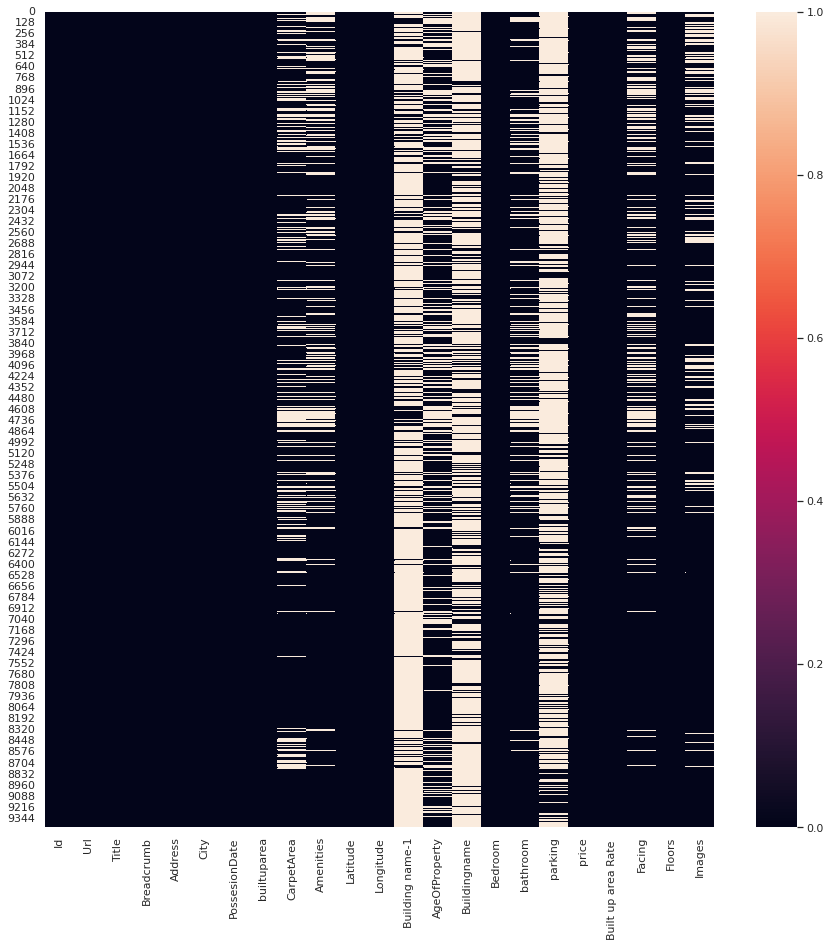

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull())

In [21]:
df2_num = df.select_dtypes(include=['int64','float64'])
df2_num.head()

,Id,Latitude,Longitude,Bedroom,bathroom,parking
0,1,19.262966,72.976679,2,2.0,NaN
1,2,19.233931,72.988406,2,2.0,NaN
2,3,19.253734,72.973441,2,2.0,1.0
3,4,19.143532,73.046473,1,2.0,NaN
4,5,19.271616,72.968925,1,1.0,NaN


In [22]:
df2_num.isnull().sum()

Id              0
Latitude        0
Longitude       0
Bedroom         0
bathroom     1363
parking      7117
dtype: int64

#finding missing variables in numerical data

In [23]:
missing_num_var = [var for var in df2_num.columns if df2_num[var].isnull().sum()>0]
related_var = ['Bedroom','City']    
missing_num_var

['bathroom', 'parking']

In [24]:
df_copy = df.copy()
num_vars_miss = ['bathroom', 'parking']
cat_vars = ['Bedroom','City']
for cat_var, num_var_miss in zip(cat_vars,num_vars_miss):
  for var_class in df[cat_var].unique():
    df_copy.update(df[df.loc[:,cat_var]==var_class][num_var_miss].replace(np.nan,df[df.loc[:,cat_var]== var_class][num_var_miss].mean()))

In [25]:
df_copy[missing_num_var].isnull().sum()

bathroom    1
parking     0
dtype: int64

In [26]:
df_copy[missing_num_var]

,bathroom,parking
0,2.0,1.136969
1,2.0,1.136969
2,2.0,1.000000
3,2.0,1.136969
4,1.0,1.136969
...,...,...
9441,3.0,2.000000
9442,2.0,1.136969
9443,2.0,1.136969
9444,1.0,1.136969


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

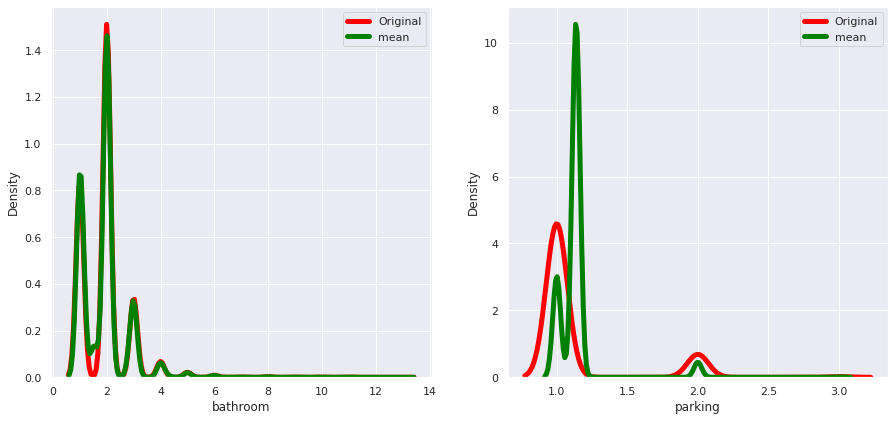

In [27]:
plt.figure(figsize=(15,15))
sns.set()
for i,var in enumerate(num_vars_miss):
  plt.subplot(2,2,i+1)
  sns.distplot(df[var],bins=20,hist=False,kde_kws={'linewidth':5,'color':'red'},label="Original")
  sns.distplot(df_copy[var],bins=20,hist=False, kde_kws={'linewidth':5,'color':'green'},label="mean")
  plt.legend()

#categorical data cleaning

In [28]:
cat_vars=df.select_dtypes(include='object')
hello = cat_vars
cat_vars.head()

,Url,Title,Breadcrumb,Address,City,PossesionDate,builtuparea,CarpetArea,Amenities,Building name-1,AgeOfProperty,Buildingname,price,Built up area Rate,Facing,Floors,Images
0,https://housing.com/in/buy/resale/page/2760130...,2 BHK Apartment,Home | Thane | Thane West | 2760130 |,"Swastik Regalia, Thane West, Thane",thane,Ready to move in,910 sq. ft.,700 sq. ft.,NaN,,10 Years,Swastik Regalia,95.0 L,10.44 K per sq. ft.,NaN,Lower of 7 floors,NaN
1,https://housing.com/in/buy/resale/page/2757498...,2 BHK Apartment,Home | Thane | Thane West | 2757498 |,"Amara, Thane West, Thane",thane,"June, 2019",875 sq. ft.,660 sq. ft.,NaN,NaN,NaN,NaN,1.15 Cr,13.14 K per sq. ft.,NaN,,https://is1-2.housingcdn.com/01c16c28/54bf6a0d...
2,https://housing.com/in/buy/resale/page/2753188...,2 BHK Apartment,Home | Thane | Thane West | 2753188 |,"Vijay Galaxy Tower 1, Waghbil Naka, Thane West...",thane,Ready to move in,999 sq. ft.,638 sq. ft.,ParkingLiftSwimming PoolSports FacilityKids Ar...,NaN,3 Years,Vijay Galaxy Tower 1,1.1 Cr,11.01 K per sq. ft.,West,Middle of 17 floors,NaN
3,https://housing.com/in/buy/resale/page/2747709...,2 BHK Apartment,Home | Thane | Shilphata | 2747709 |,"Flat No 1705, Shil-phata, 17 Floor, Near Mahap...",thane,Ready to move in,945 sq. ft.,651 sq. ft.,NaN,NaN,0 Years,NaN,67.0 L,7089.00 per sq. ft.,North-East,Higher of 21 floors,NaN
4,https://housing.com/in/buy/resale/page/2750468...,1 BHK Apartment,Home | Thane | Thane West | 2750468 |,"Puraniks Kanchan Pushp Society, Thane West, Thane",thane,Ready to move in,490 sq. ft.,400 sq. ft.,LiftKids AreaGardenGas PipelineGated Community,NaN,15 Years,NaN,54.0 L,11.02 K per sq. ft.,East,Higher of 7 floors,https://is1-2.housingcdn.com/01c16c28/037ddf6b...


In [29]:
cat_vars.isnull().sum()

Url                       0
Title                     0
Breadcrumb                0
Address                   0
City                      0
PossesionDate             9
builtuparea               0
CarpetArea             1923
Amenities              1659
Building name-1        7527
AgeOfProperty          2588
Buildingname           7354
price                     0
Built up area Rate        0
Facing                 1836
Floors                    0
Images                 1441
dtype: int64

In [30]:
isnull_per = cat_vars.isnull().mean()*100
miss_vars_cat = isnull_per[isnull_per >0].keys()
miss_vars_cat

Index(['PossesionDate', 'CarpetArea', 'Amenities', 'Building name-1',
       'AgeOfProperty', 'Buildingname', 'Facing', 'Images'],
      dtype='object')

In [31]:
for var in miss_vars_cat:
  cat_vars[var].fillna(cat_vars[var].mode()[0],inplace=True)
  print(var,'=',cat_vars[var].mode()[0])

PossesionDate = Ready to move in
CarpetArea = 450 sq. ft.
Amenities = ParkingPower BackupWater SupplySecurityLiftSwimming PoolSports FacilityKids AreaGymGardenGated Community
Building name-1 = Middle
AgeOfProperty = 0 Years
Buildingname = Sukur Enclave
Facing = East
Images = https://is1-2.housingcdn.com/08eeb3ff/aa688bd4053c23a6c305e84cb212ac6a/v0/large/3_bhk_apartment-for-sale-thane_west-Thane-building_view.jpg


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [32]:
cat_vars.isnull().sum()

Url                    0
Title                  0
Breadcrumb             0
Address                0
City                   0
PossesionDate          0
builtuparea            0
CarpetArea             0
Amenities              0
Building name-1        0
AgeOfProperty          0
Buildingname           0
price                  0
Built up area Rate     0
Facing                 0
Floors                 0
Images                 0
dtype: int64